# Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
#import sklearn
#from sklearn.utils.fixes import MaskedArray
#from autoviz.AutoViz_Class import AutoViz_Class
import ppscore as pps
import impyute as impy
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [9]:
port1=pd.read_csv('data/estaticos_portfolio1.csv')

In [10]:
port2=pd.read_csv('data/estaticos_portfolio2.csv')

In [11]:
port3=pd.read_csv('data/estaticos_portfolio3.csv')

In [12]:
market=pd.read_csv('data/estaticos_market.csv')

In [13]:
market.drop(['Unnamed: 0'],axis=1,inplace= True)

In [14]:
market.set_index('id',inplace=True)

# Análise Exploratoria

In [15]:
market.shape

(462298, 180)

In [16]:
market.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae39509

In [321]:
for i in market.columns:
    print(i)

fl_matriz
de_natureza_juridica
sg_uf
natureza_juridica_macro
de_ramo
setor
idade_empresa_anos
idade_emp_cat
fl_me
fl_sa
fl_epp
fl_mei
fl_ltda
dt_situacao
fl_st_especial
fl_email
fl_telefone
fl_rm
nm_divisao
nm_segmento
fl_spa
fl_antt
fl_veiculo
vl_total_tancagem
vl_total_veiculos_antt
vl_total_veiculos_leves
vl_total_veiculos_pesados
fl_optante_simples
qt_art
vl_total_veiculos_pesados_grupo
vl_total_veiculos_leves_grupo
vl_total_tancagem_grupo
vl_total_veiculos_antt_grupo
vl_potenc_cons_oleo_gas
fl_optante_simei
sg_uf_matriz
de_saude_tributaria
de_saude_rescencia
nu_meses_rescencia
de_nivel_atividade
de_indicador_telefone
fl_simples_irregular
vl_frota
empsetorcensitariofaixarendapopulacao
nm_meso_regiao
nm_micro_regiao
fl_passivel_iss
qt_socios
qt_socios_pf
qt_socios_pj
idade_media_socios
idade_maxima_socios
idade_minima_socios
qt_socios_st_regular
qt_socios_st_suspensa
qt_socios_masculino
qt_socios_feminino
qt_socios_pep
qt_alteracao_socio_total
qt_alteracao_socio_90d
qt_alteracao_soc

## **Definindo funções e auxiliares para EDA**

In [17]:
#Criando um dataframe auxiliar para analises

aux = pd.DataFrame({'colunas' : market.columns,
                    'tipo': market.dtypes,
                    'missing' : market.isna().sum(),
                    'size' : market.shape[0],
                    'unicos': market.nunique()})

In [18]:
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux['completa'] = ['completa' if x == 0 else 'faltante' for x in aux['percentual']]

In [19]:
def missing(data,nome):
    msno.bar(data,sort='descending')
    plt.title(nome,fontsize=30)
    return plt.show()
    

In [20]:
def missing_dendo(data,nome):
    msno.dendrogram(data)
    plt.title(nome,fontsize=30)
    return plt.show()

## **Dividindo em numéricas e categoricas**

In [21]:
col_num= pd.Series(aux[((aux['tipo'] != 'object') &
                      (aux['tipo'] != 'bool'))]['colunas'])

In [22]:
market_num=market[col_num]

In [23]:
col_cat= pd.Series(aux[((aux['tipo'] != 'float64') &
                      (aux['tipo'] != 'int64'))]['colunas'])

In [24]:
market_cat=market[col_cat]

## **Verificando os nulos númericos**

In [25]:
market_num.shape

(462298, 145)

In [26]:
null_90=list()
null_80=list()
null_60=list()
null_20=list()
null_00=list()
for i in market_num.columns:
    if (market_num[i].isnull().sum()/market_num.shape[0]) > 0.9:
        null_90.append(i)
    elif (0.8 <= (market_num[i].isnull().sum()/market_num.shape[0]) < 0.9):
        null_80.append(i)
    elif (0.6 <= (market_num[i].isnull().sum()/market_num.shape[0]) < 0.8):
        null_60.append(i)
    elif (0.2 <= (market_num[i].isnull().sum()/market_num.shape[0]) < 0.6):
        null_20.append(i)
    elif (0.0 <= (market_num[i].isnull().sum()/market_num.shape[0]) < 0.2):
        null_00.append(i)

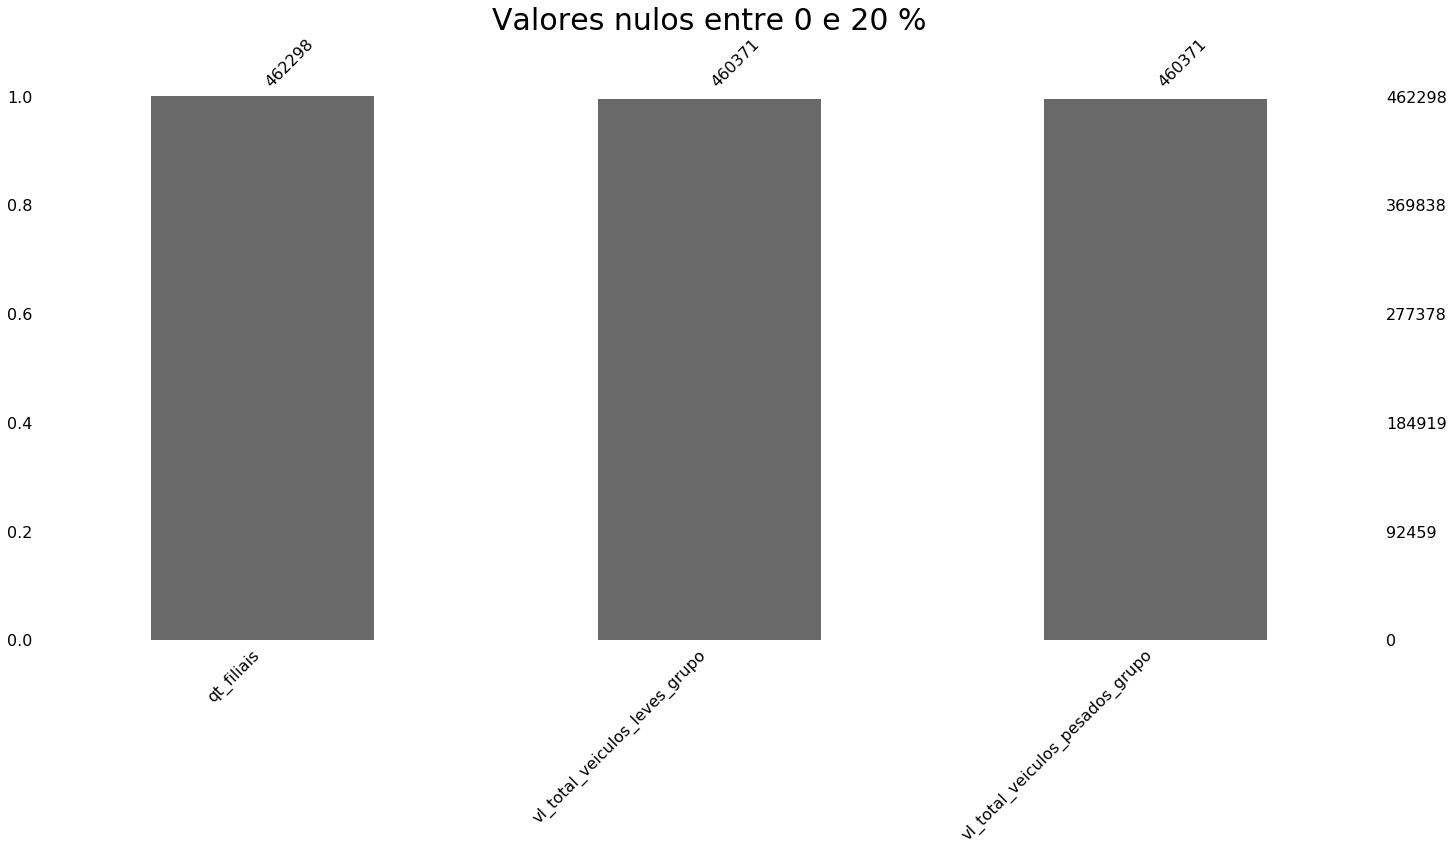

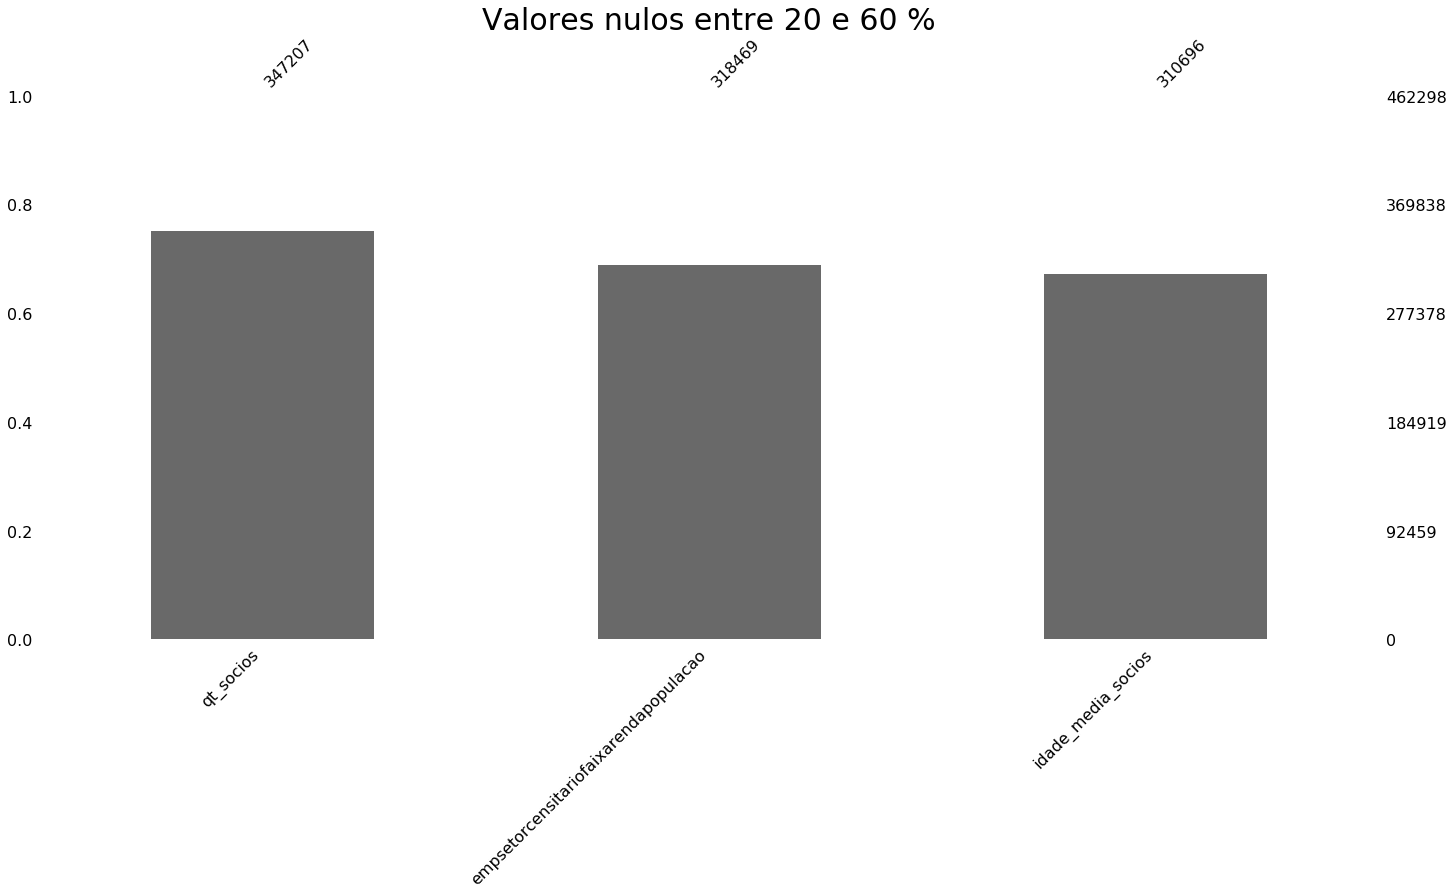

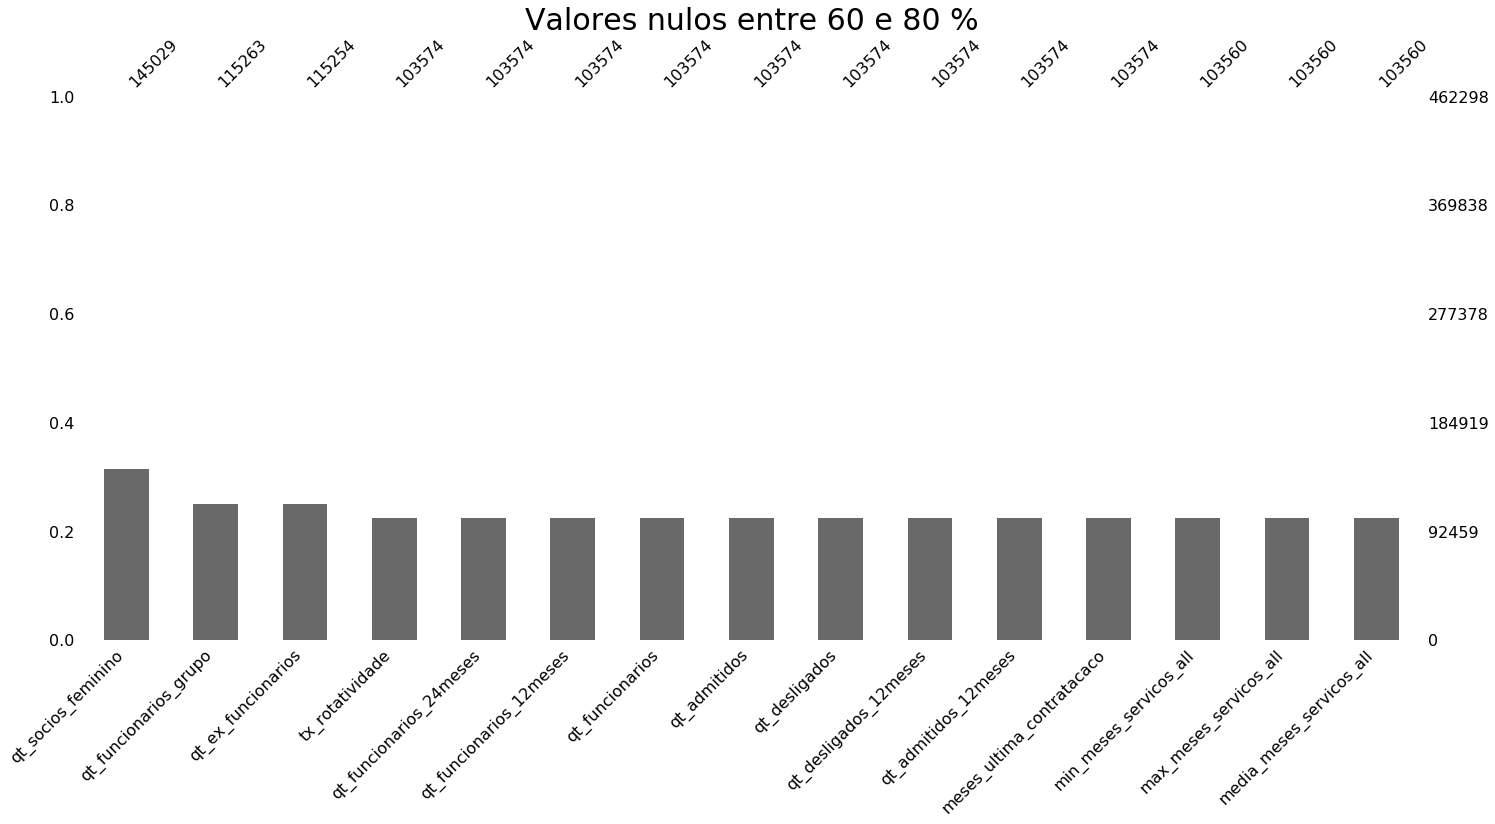

In [28]:
missing(market_num[null_00],'Valores nulos entre 0 e 20 %')
missing(market_num[null_20],'Valores nulos entre 20 e 60 %')
missing(market_num[null_60],'Valores nulos entre 60 e 80 %')

Como são muitos valores acima de 80% não será possivel observa-los em gráficos, então:

In [137]:
market_80=pd.DataFrame({'colunas':null_80,
                        'missing':(market_num[null_80].isnull().sum())})
market_90=pd.DataFrame({'colunas':null_90,
                        'missing':(market_num[null_90].isnull().sum())})

In [138]:
market_80.sort_values(by='missing',ascending=False,inplace=True)
market_90.sort_values(by='missing',ascending=False,inplace=True)

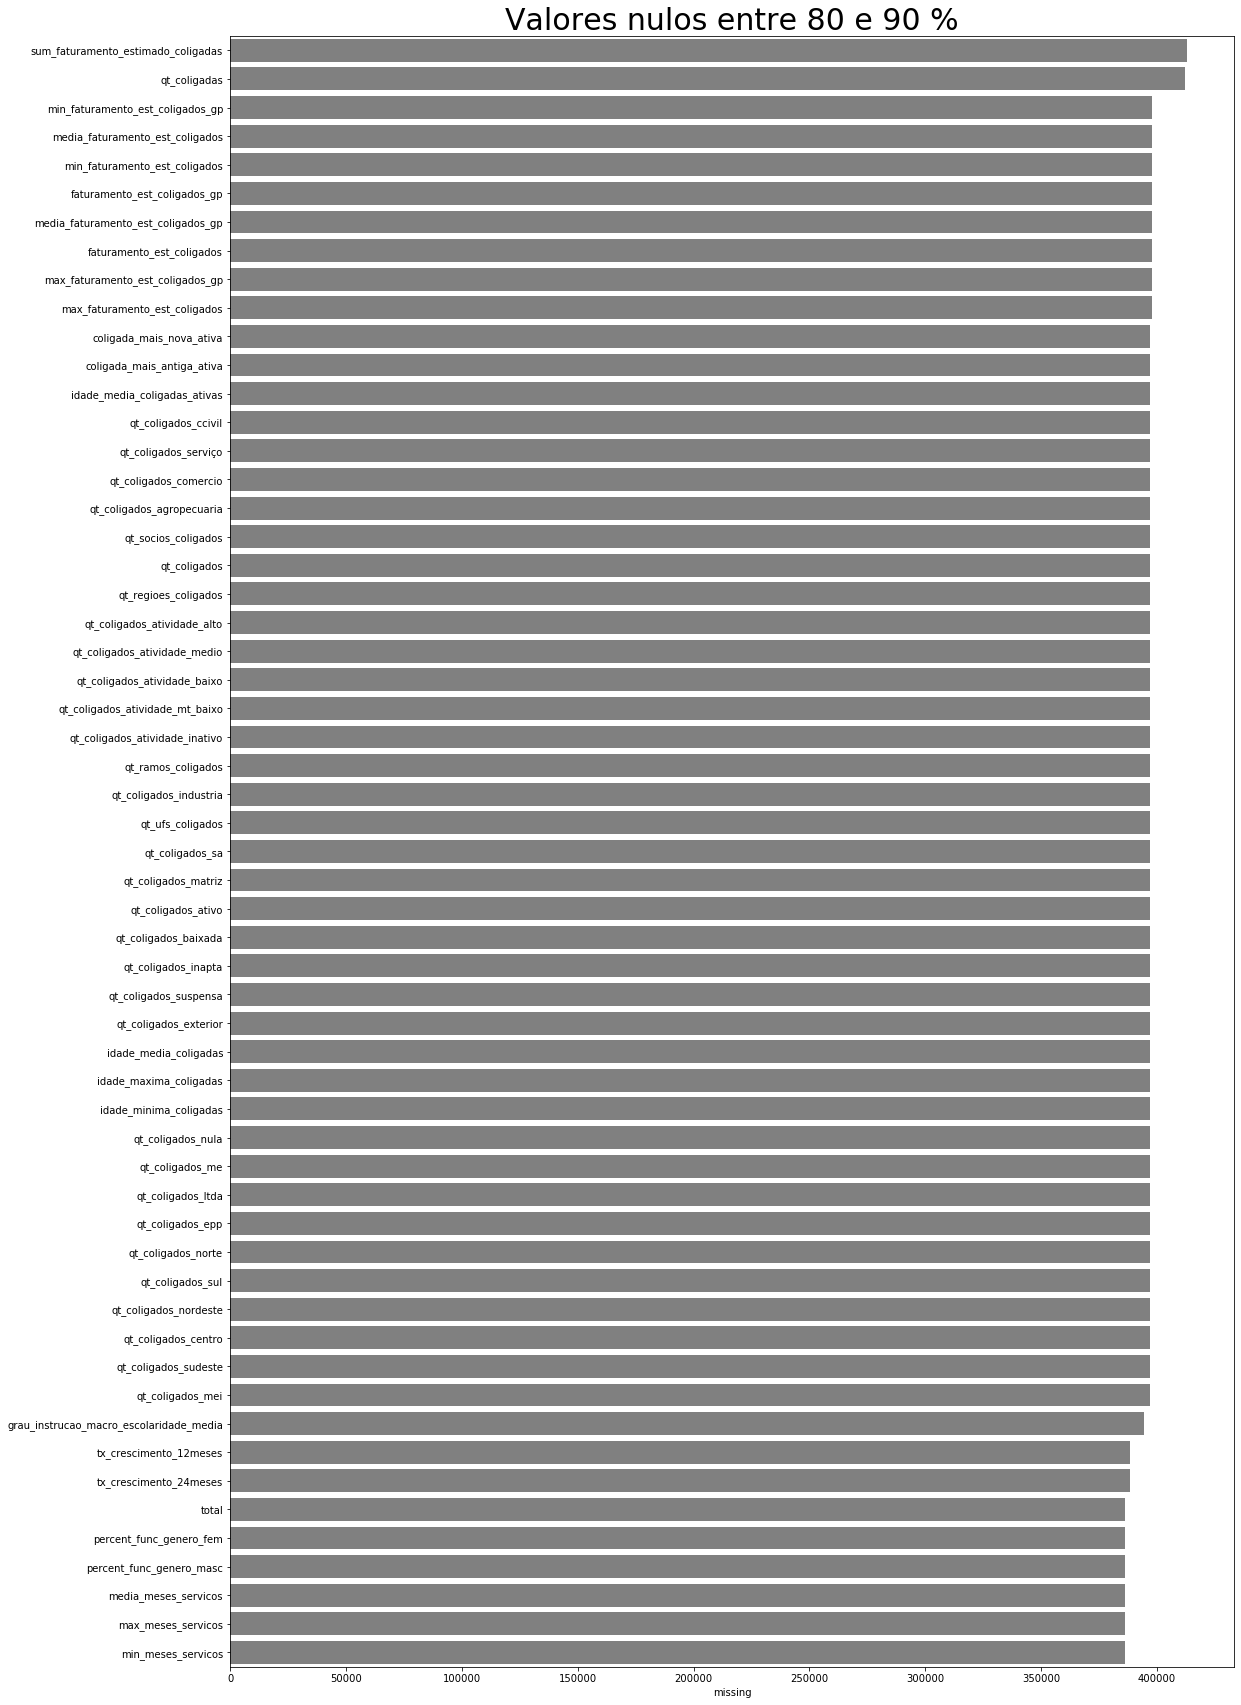

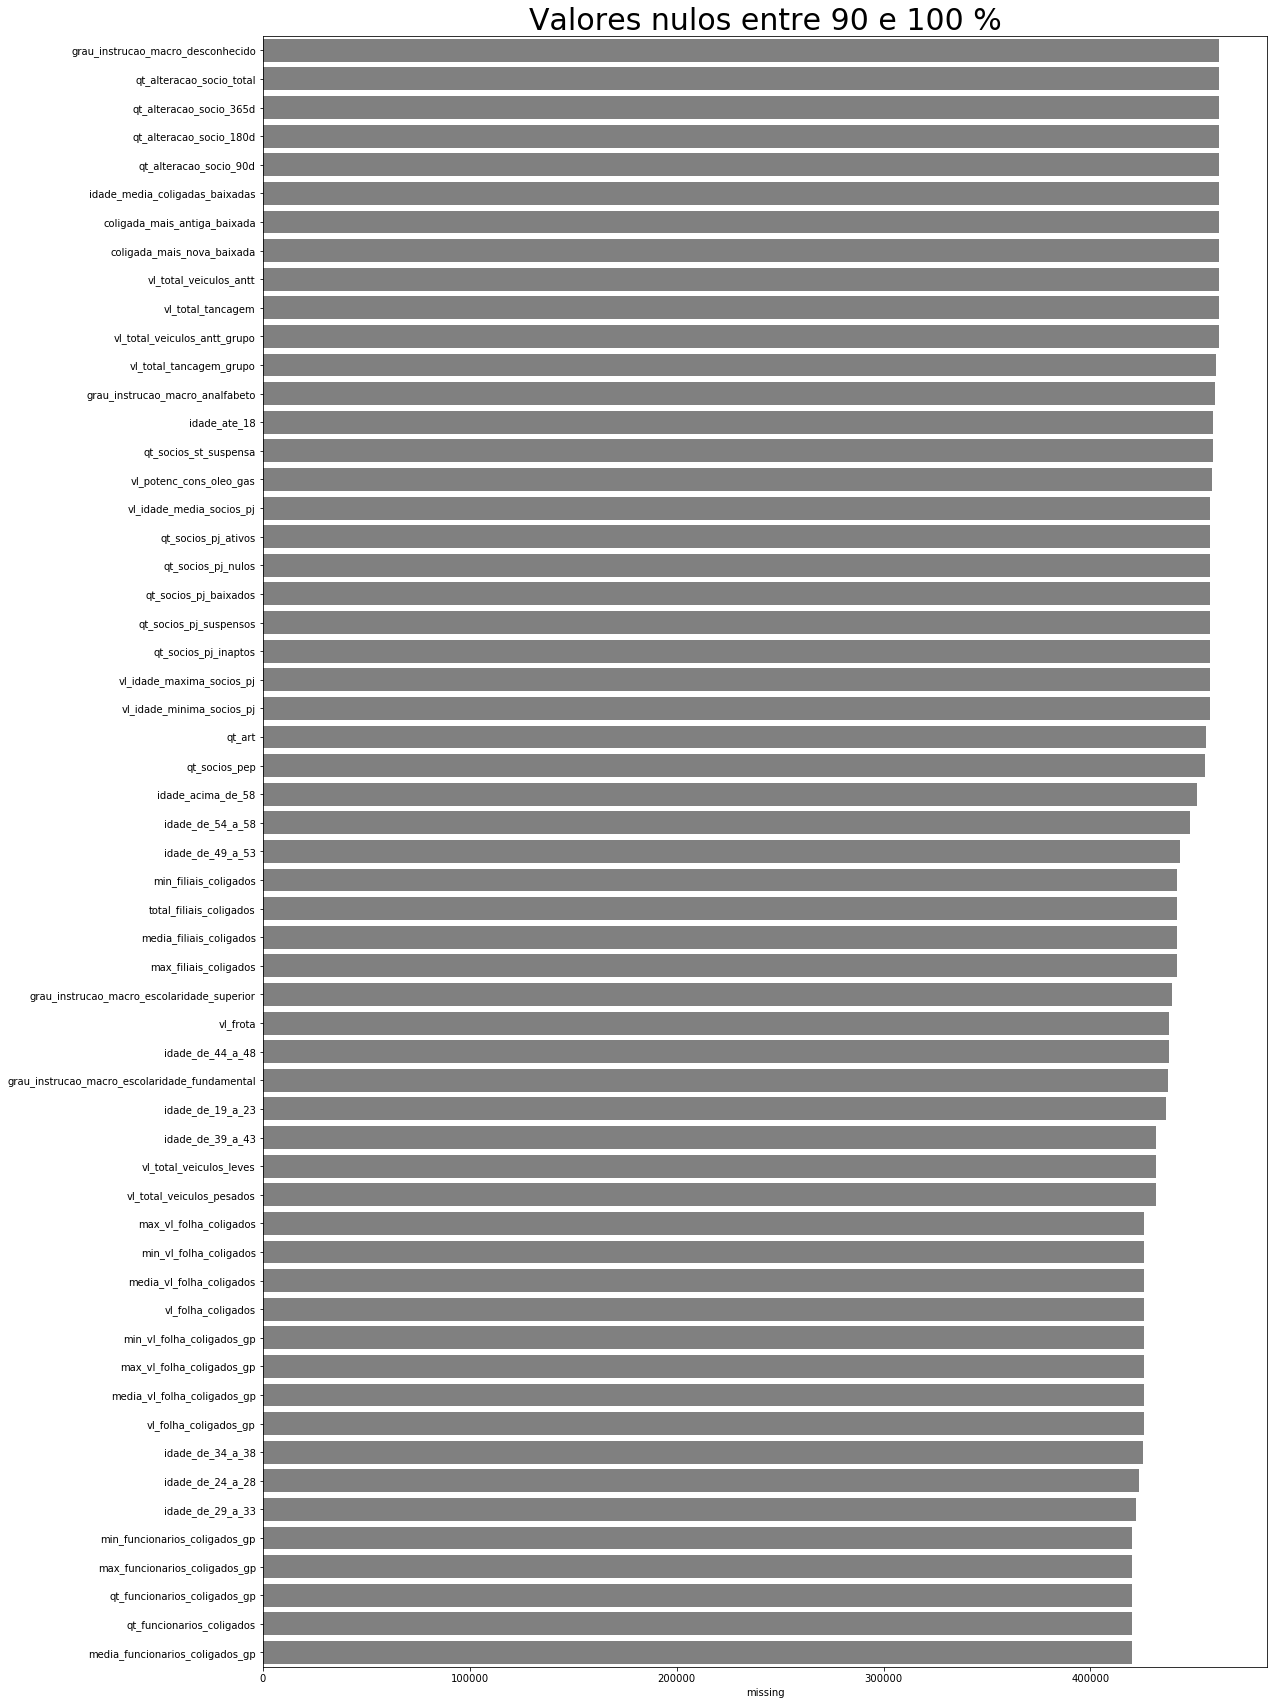

In [139]:
plt.figure(figsize=(18,30))
sns.barplot(x=market_80['missing'],y=market_80.index,color='gray')
plt.title('Valores nulos entre 80 e 90 %',fontsize=30)
plt.show()

plt.figure(figsize=(18,30))
sns.barplot(x=market_90['missing'],y=market_90.index,color='gray')
plt.title('Valores nulos entre 90 e 100 %',fontsize=30)
plt.show()

In [140]:
print('Entre 80 e 90 %:\n')
for i in null_80:
    print(i,': ',market_num[i].isnull().sum()/market_num.shape[0],'%')

Entre 80 e 90 %:

qt_coligados :  0.8585522758047839 %
qt_socios_coligados :  0.8585522758047839 %
qt_coligados_matriz :  0.8585522758047839 %
qt_coligados_ativo :  0.8585522758047839 %
qt_coligados_baixada :  0.8585522758047839 %
qt_coligados_inapta :  0.8585522758047839 %
qt_coligados_suspensa :  0.8585522758047839 %
qt_coligados_nula :  0.8585522758047839 %
idade_media_coligadas :  0.8585522758047839 %
idade_maxima_coligadas :  0.8585522758047839 %
idade_minima_coligadas :  0.8585522758047839 %
coligada_mais_nova_ativa :  0.8590800738917321 %
coligada_mais_antiga_ativa :  0.8590800738917321 %
idade_media_coligadas_ativas :  0.8590800738917321 %
qt_coligados_sa :  0.8585522758047839 %
qt_coligados_me :  0.8585522758047839 %
qt_coligados_mei :  0.8585522758047839 %
qt_coligados_ltda :  0.8585522758047839 %
qt_coligados_epp :  0.8585522758047839 %
qt_coligados_norte :  0.8585522758047839 %
qt_coligados_sul :  0.8585522758047839 %
qt_coligados_nordeste :  0.8585522758047839 %
qt_coligad

In [141]:
print('Entre 90 e 100 %:\n')
for i in null_90:
    print(i,': ',market_num[i].isnull().sum()/market_num.shape[0],'%')

Entre 90 e 100 %:

vl_total_tancagem :  0.9993943300641578 %
vl_total_veiculos_antt :  0.9996192931831849 %
vl_total_veiculos_leves :  0.9336272274593445 %
vl_total_veiculos_pesados :  0.9336272274593445 %
qt_art :  0.98574512543857 %
vl_total_tancagem_grupo :  0.9961929318318488 %
vl_total_veiculos_antt_grupo :  0.9992731960769893 %
vl_potenc_cons_oleo_gas :  0.9920332772367607 %
vl_frota :  0.9476744437570571 %
qt_socios_st_suspensa :  0.9929677394234887 %
qt_socios_pep :  0.9854141700807704 %
qt_alteracao_socio_total :  1.0 %
qt_alteracao_socio_90d :  1.0 %
qt_alteracao_socio_180d :  1.0 %
qt_alteracao_socio_365d :  1.0 %
qt_socios_pj_ativos :  0.9901708421840458 %
qt_socios_pj_nulos :  0.9901708421840458 %
qt_socios_pj_baixados :  0.9901708421840458 %
qt_socios_pj_suspensos :  0.9901708421840458 %
qt_socios_pj_inaptos :  0.9901708421840458 %
vl_idade_media_socios_pj :  0.9901708421840458 %
vl_idade_maxima_socios_pj :  0.9901708421840458 %
vl_idade_minima_socios_pj :  0.990170842184

### Dendogramas

Os dendogramas ajudas-nos a entender a relação das variáveis:
 The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

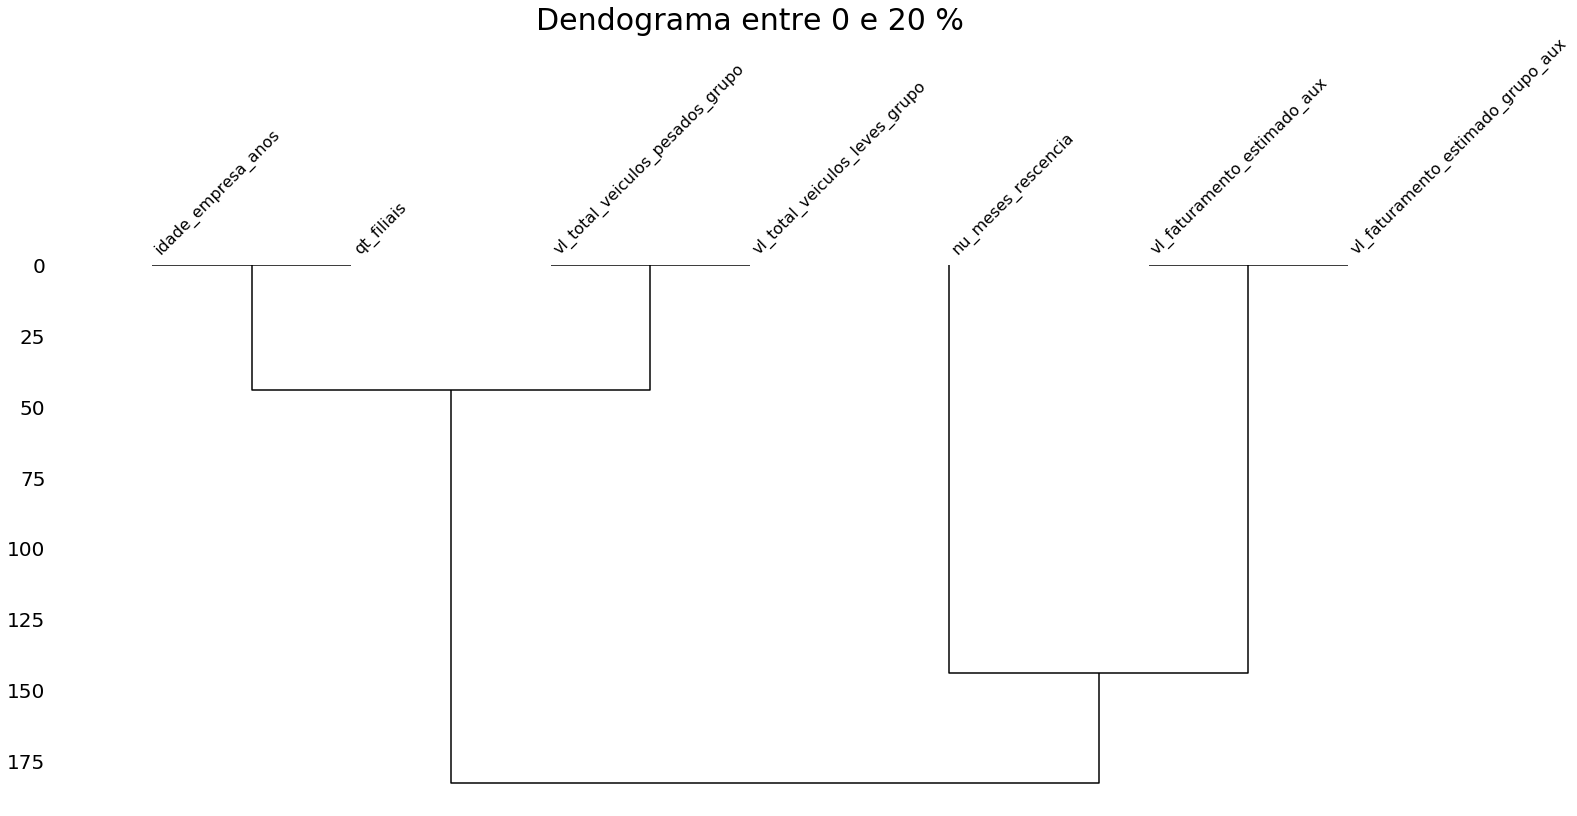

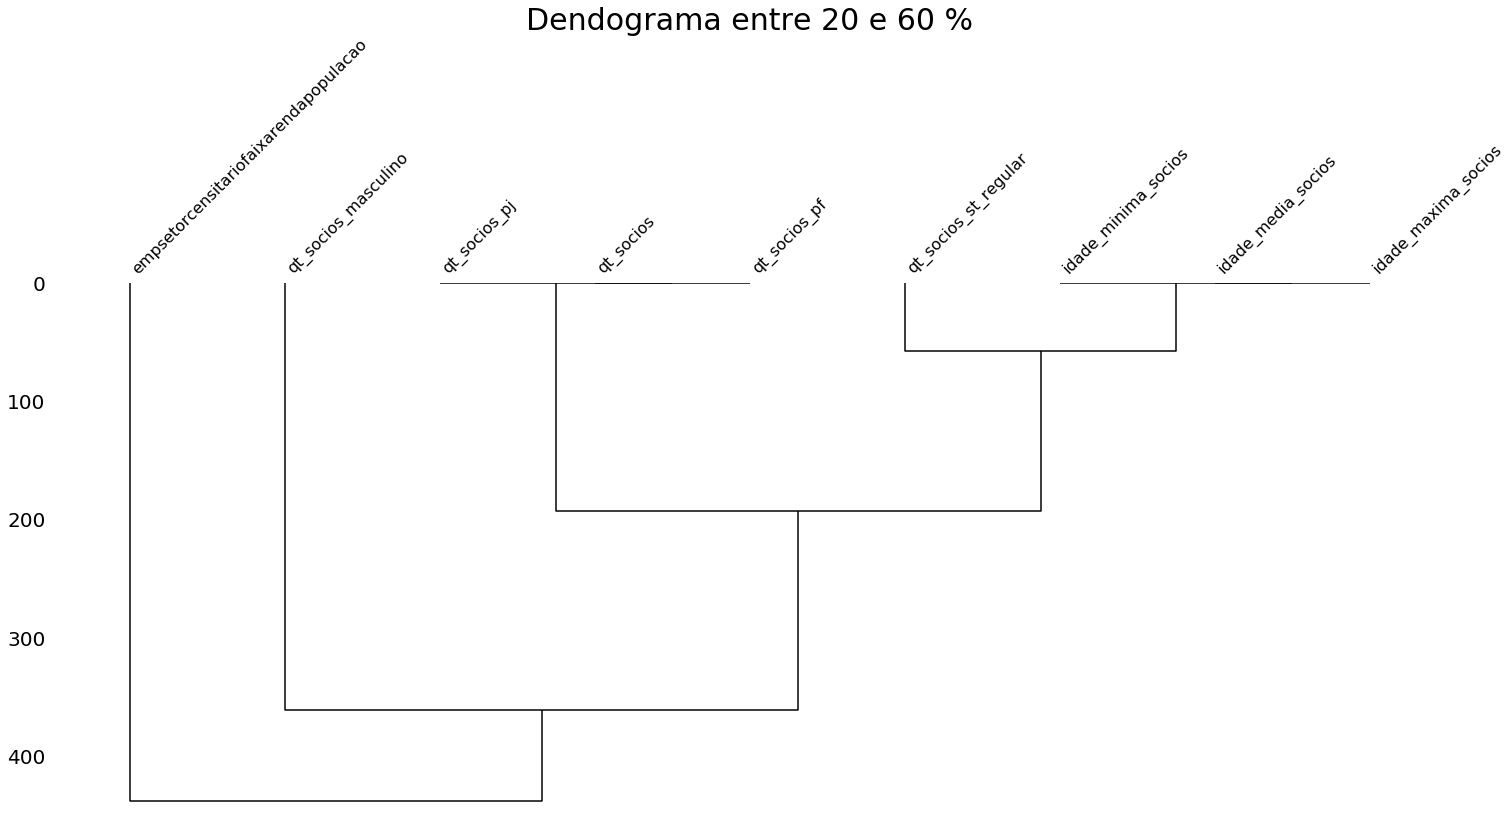

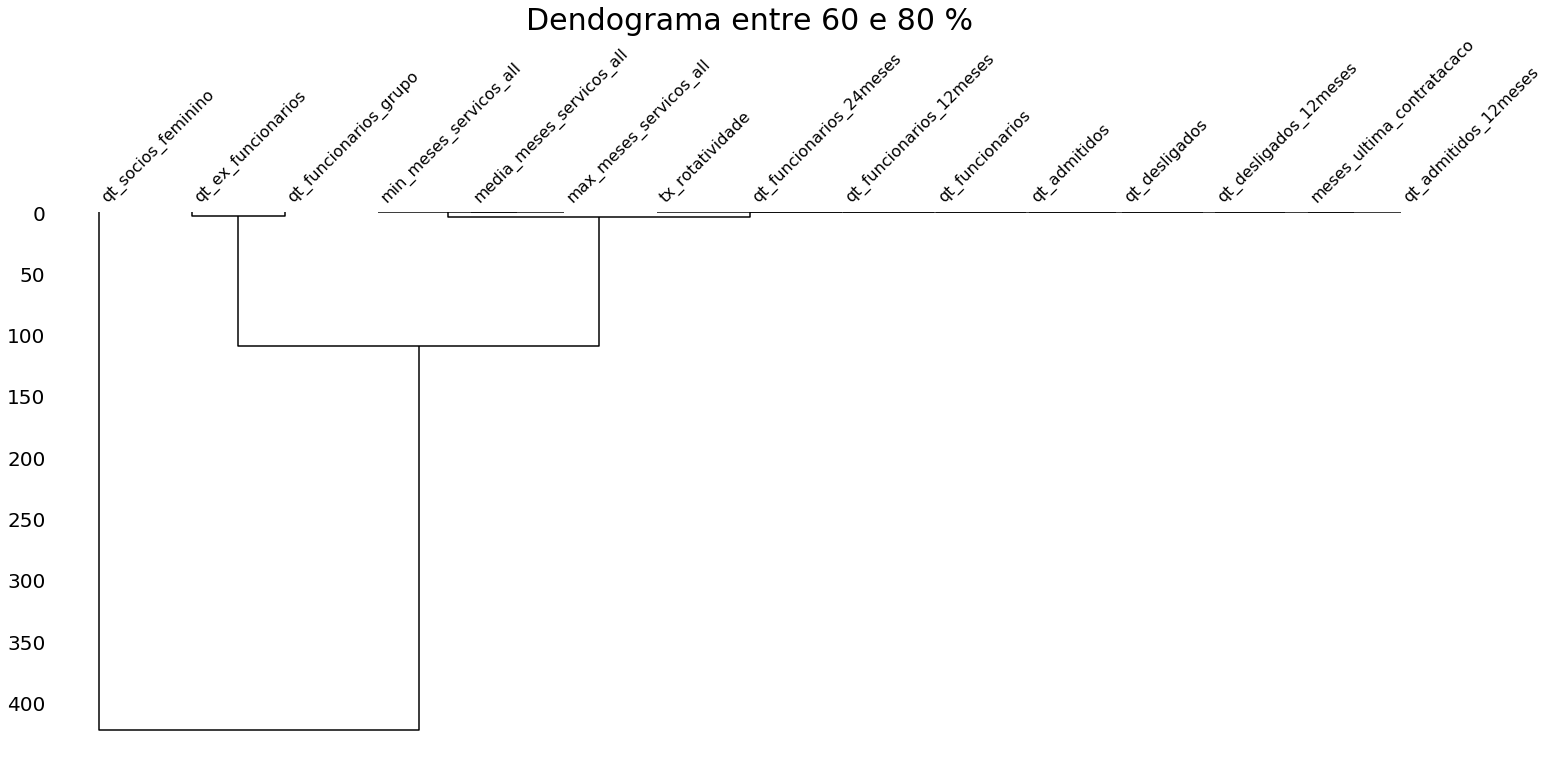

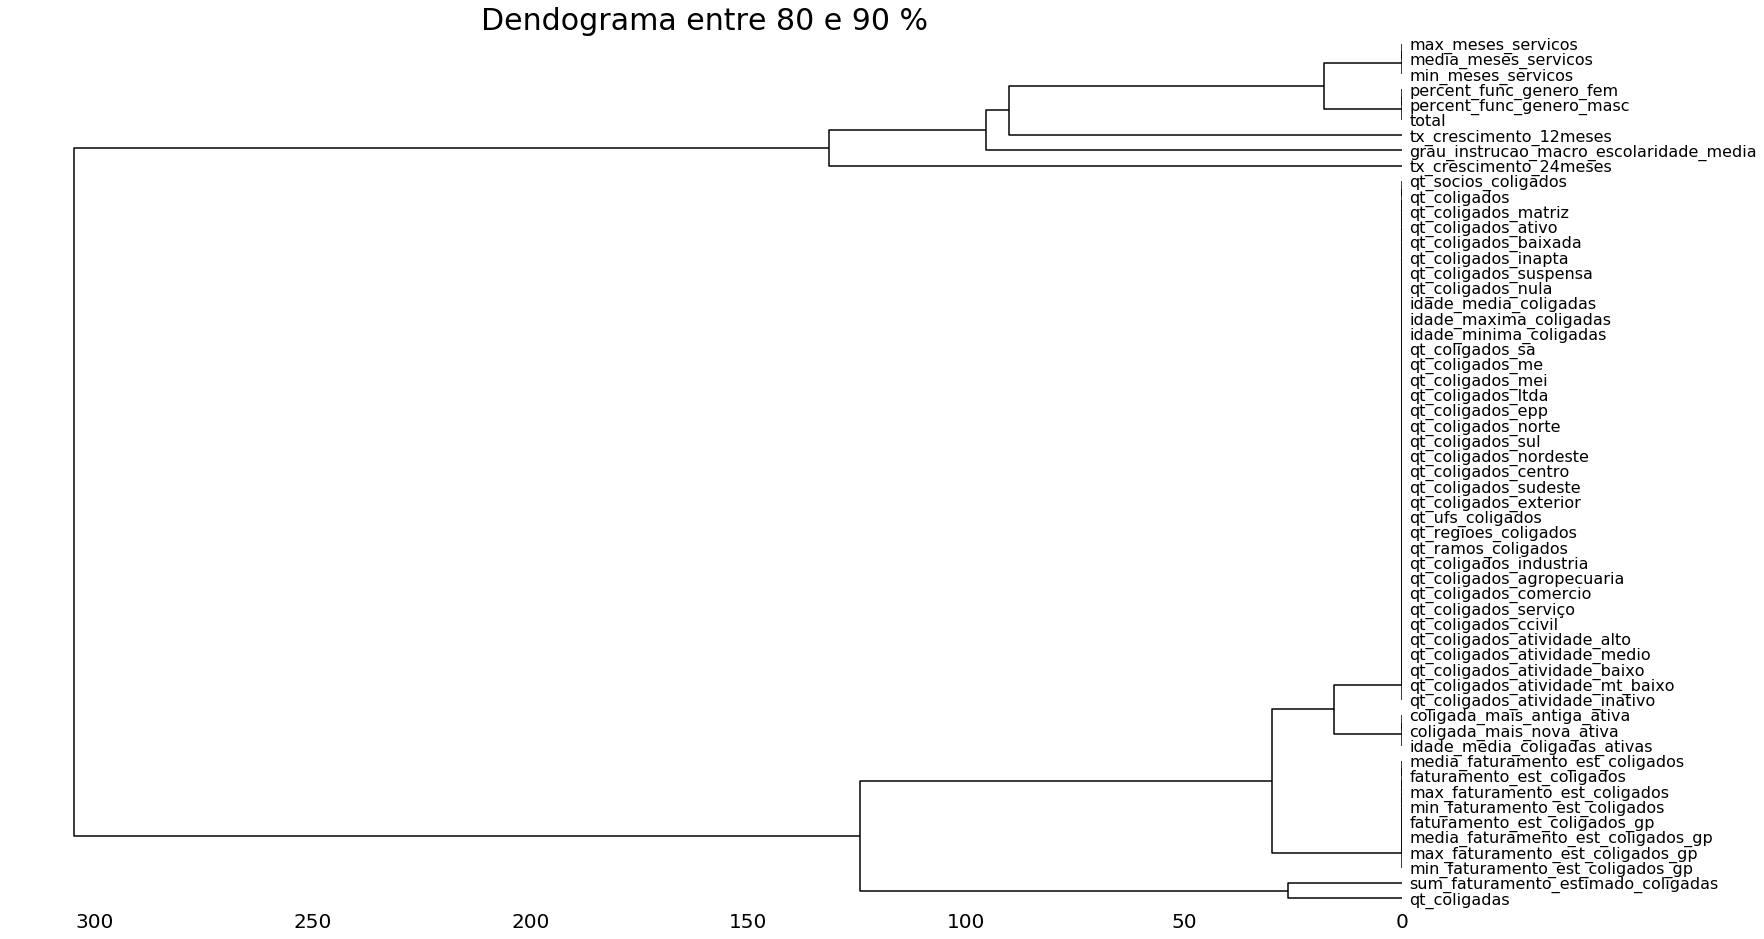

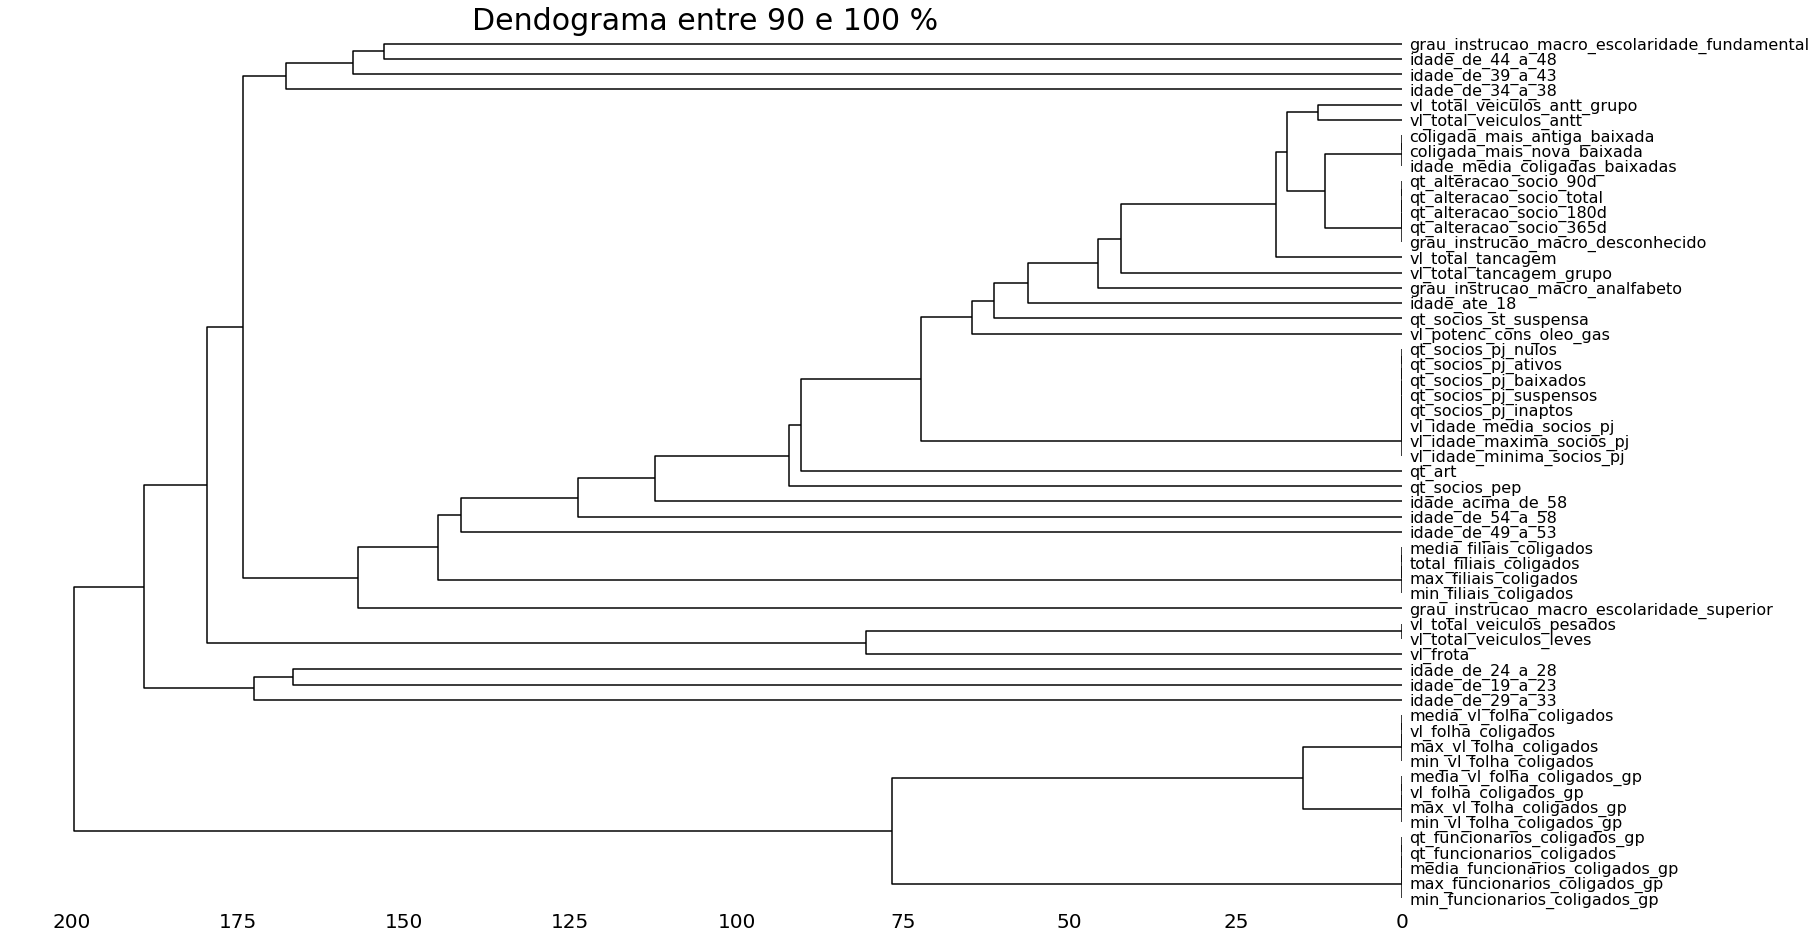

In [142]:
missing_dendo(market_num[null_00],'Dendograma entre 0 e 20 %')
missing_dendo(market_num[null_20],'Dendograma entre 20 e 60 %')
missing_dendo(market_num[null_60],'Dendograma entre 60 e 80 %')
missing_dendo(market_num[null_80],'Dendograma entre 80 e 90 %')
missing_dendo(market_num[null_90],'Dendograma entre 90 e 100 %')

## **Verificando os nulos categoricos**

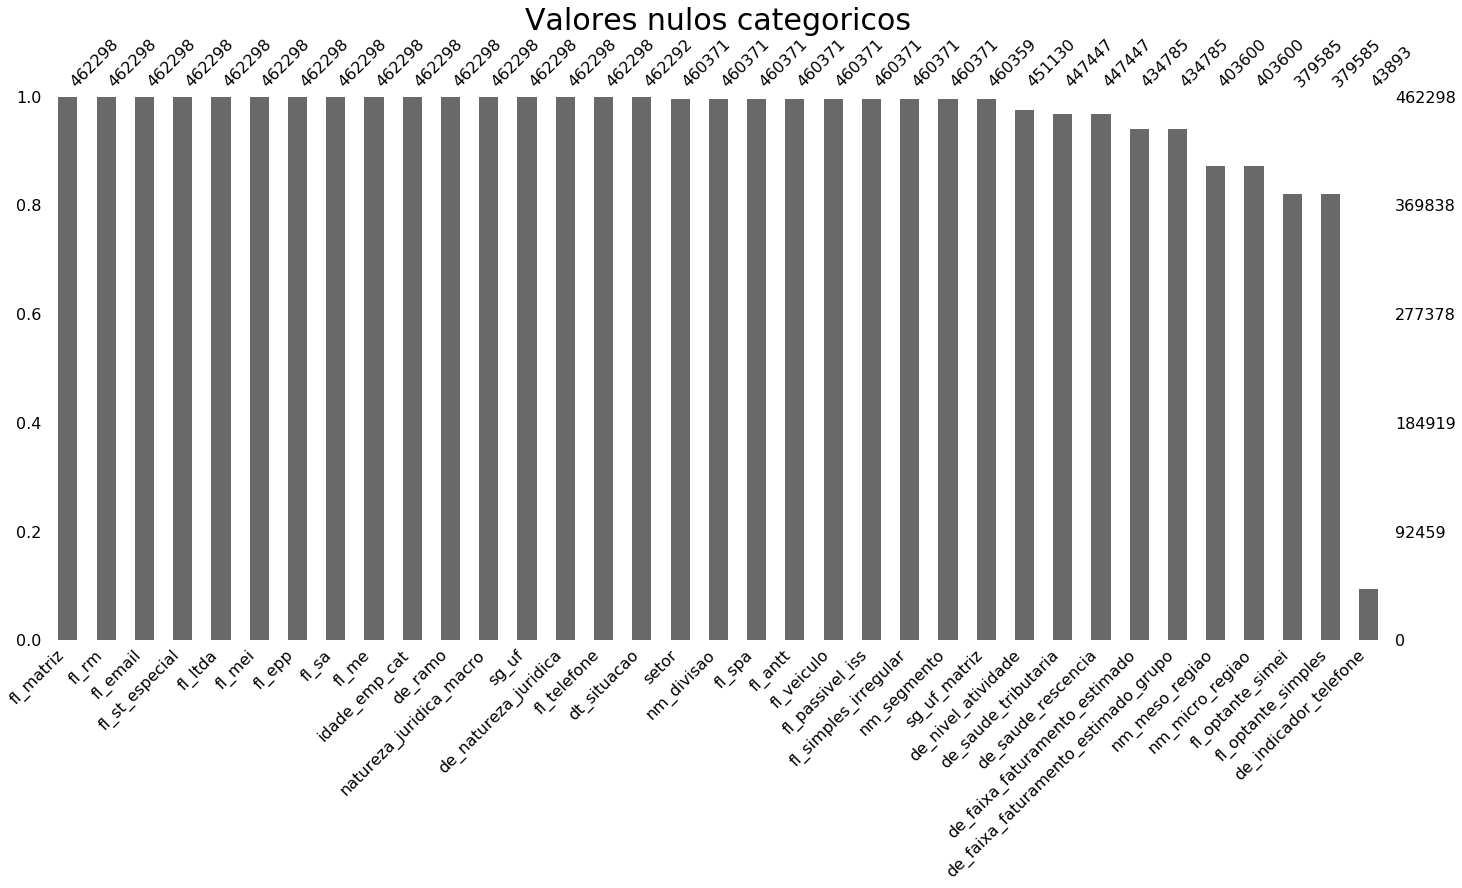

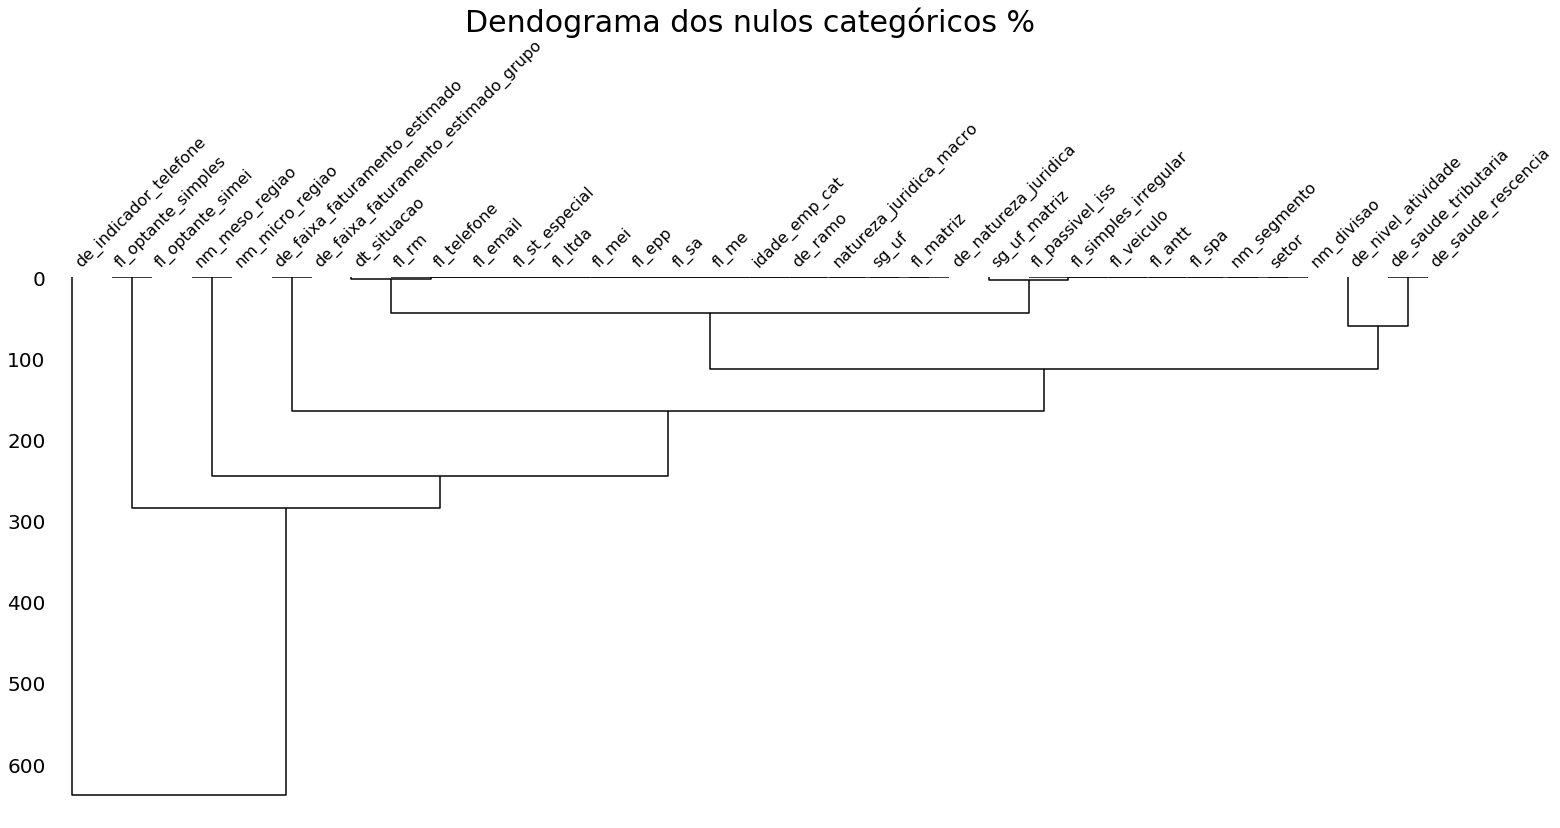

In [143]:
missing(market_cat,'Valores nulos categoricos')
missing_dendo(market_cat,'Dendograma dos nulos categóricos %')

***

### Pre-Processamento

Dropando os que decidi ser inutil por conta dos nulos ou redundante durante análise dos nulos.

In [27]:
market_num.drop(null_90,axis=1,inplace=True)

In [28]:
market_num.drop(null_80,axis=1,inplace=True)

In [29]:
market_num.drop(['qt_socios_feminino',
 'qt_ex_funcionarios',
 'qt_funcionarios_grupo',
 'meses_ultima_contratacaco',
 'qt_admitidos_12meses',
 'qt_desligados_12meses',
 'qt_desligados',
 'qt_admitidos',
 'media_meses_servicos_all',
 'max_meses_servicos_all',
 'min_meses_servicos_all',
 'qt_funcionarios_12meses',
 'qt_funcionarios_24meses'],axis=1,inplace=True)

In [30]:
market_num.drop(['qt_socios_st_regular',
                 'qt_socios_pf',
                 'qt_socios_pj',
                 'idade_maxima_socios',
                 'idade_minima_socios',
                 'qt_socios_masculino',
                 'idade_empresa_anos',
                 'vl_faturamento_estimado_aux',
                 'vl_faturamento_estimado_grupo_aux'],axis=1,inplace=True)

In [31]:
market_num.drop(['nu_meses_rescencia'],axis=1,inplace=True)

In [32]:

market_cat.drop(['fl_simples_irregular',
                'de_indicador_telefone',
                'de_saude_rescencia',
                'sg_uf_matriz',
                'fl_spa',
                'nm_segmento',
                'nm_divisao',
                'dt_situacao',
                'fl_ltda',
                'fl_epp',
                'fl_sa',
                'fl_me',
                #'setor',
                'de_natureza_juridica',
                'de_faixa_faturamento_estimado',
                'nm_micro_regiao',
                'fl_optante_simples',
                'fl_optante_simei'],axis=1,inplace=True)

Começando a exclusão de linhas, preenchimentos de nulos, correlações

In [33]:
## nm_meso_regiao

market_cat.loc[(market_cat['sg_uf']=='RO') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='RONDONIA'
market_cat.loc[(market_cat['sg_uf']=='MA') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='NORTE MARANHENSE'
market_cat.loc[(market_cat['sg_uf']=='RN') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='LESTE POTIGUAR'
market_cat.loc[(market_cat['sg_uf']=='AM') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='CENTRO AMAZONENSE'
market_cat.loc[(market_cat['sg_uf']=='PI') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='CENTRO NORTE PIAUIENSE'
market_cat.loc[(market_cat['sg_uf']=='AC') & (market_cat['nm_meso_regiao'].isnull()),'nm_meso_regiao']='VALE DO ACRE'
market_cat.drop(['sg_uf'],axis=1,inplace=True)

In [46]:
market_pre=pd.concat([market_cat,market_num],axis=1)

In [47]:
market_pre.columns

Index(['fl_matriz', 'natureza_juridica_macro', 'de_ramo', 'setor',
       'idade_emp_cat', 'fl_mei', 'fl_st_especial', 'fl_email', 'fl_telefone',
       'fl_rm', 'fl_antt', 'fl_veiculo', 'de_saude_tributaria',
       'de_nivel_atividade', 'nm_meso_regiao', 'fl_passivel_iss',
       'de_faixa_faturamento_estimado_grupo',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'empsetorcensitariofaixarendapopulacao', 'qt_socios',
       'idade_media_socios', 'qt_funcionarios', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object')

In [48]:
## fl_antt
## fl_veiculo

market_pre['fl_antt'].fillna(0,inplace=True) ##nao teria
market_pre['fl_veiculo'].fillna(0,inplace=True) ##nao teria, seria inutio imaginar se tiver
market_pre = market_pre[market_pre.fl_st_especial != 1] #tirando os "falidos"
market_pre.drop('fl_st_especial',axis=1,inplace=True)

In [49]:
## fl_passivel_iss
## vl_total_veiculos_pesados_grupo
## vl_total_veiculos_leves_grupo

market_pre['fl_passivel_iss'].fillna(0,inplace=True)
market_pre['vl_total_veiculos_pesados_grupo'].fillna(0,inplace=True)
market_pre['vl_total_veiculos_leves_grupo'].fillna(0,inplace=True)
market_pre['de_nivel_atividade'].fillna('MEDIA',inplace=True)
market_pre['de_saude_tributaria'].fillna('VERDE',inplace=True)

In [50]:
## empsetorcensitariofaixarendapopulacao

input_renda=market_pre.groupby('fl_rm').agg({'empsetorcensitariofaixarendapopulacao': 'mean'})
market_pre.loc[(market_pre['fl_rm'] == 'SIM') & (market_pre['empsetorcensitariofaixarendapopulacao'].isnull()), 'empsetorcensitariofaixarendapopulacao'] = input_renda.values[1]
market_pre.loc[(market_pre['fl_rm'] == 'NAO') & (market_pre['empsetorcensitariofaixarendapopulacao'].isnull()), 'empsetorcensitariofaixarendapopulacao'] = input_renda.values[0]

In [51]:
## empsetorcensitariofaixarendapopulacao

input_renda=market_pre.groupby('fl_rm').agg({'empsetorcensitariofaixarendapopulacao': 'mean'})
market_pre.loc[(market_pre['fl_rm'] == 'SIM') & (market_pre['empsetorcensitariofaixarendapopulacao'].isnull()), 'empsetorcensitariofaixarendapopulacao'] = input_renda.values[1]
market_pre.loc[(market_pre['fl_rm'] == 'NAO') & (market_pre['empsetorcensitariofaixarendapopulacao'].isnull()), 'empsetorcensitariofaixarendapopulacao'] = input_renda.values[0]

In [60]:
## qt_funcionarios e setor

input_funcionarios=market.groupby('setor').agg({'qt_funcionarios': 'mean'})
market_pre.loc[(market_pre['setor'] == 'AGROPECUARIA') & (market_pre['qt_funcionarios'].isnull()), 'qt_funcionarios'] = input_funcionarios.values[0]
market_pre.loc[(market_pre['setor'] == 'COMERCIO') & (market_pre['qt_funcionarios'].isnull()), 'qt_funcionarios'] = input_funcionarios.values[1]
market_pre.loc[(market_pre['setor'] == 'CONSTRUÇÃO CIVIL') & (market_pre['qt_funcionarios'].isnull()), 'qt_funcionarios'] = input_funcionarios.values[2]
market_pre.loc[(market_pre['setor'] == 'INDUSTRIA') & (market_pre['qt_funcionarios'].isnull()), 'qt_funcionarios'] = input_funcionarios.values[3]
market_pre.loc[(market_pre['setor'] == 'SERVIÇO') & (market_pre['qt_funcionarios'].isnull()), 'qt_funcionarios'] = input_funcionarios.values[4]
market_pre['qt_funcionarios'].fillna(10,inplace=True)
market_pre['setor'].fillna('SERVIÇO',inplace=True)

In [61]:
## Inputando em qt_socios,idade_media_socios,qt_funcionarios,tx_rotatividade

market_pre['qt_socios'].fillna(-1,inplace=True)
market_pre['idade_media_socios'].fillna(-1,inplace=True)
market_pre['tx_rotatividade'].fillna(market_pre['tx_rotatividade'].mean(),inplace=True)

In [62]:
## Inputando de_faixa_faturamento_estimado_grupo

#market_pre.groupby('fl_mei').agg({'de_faixa_faturamento_estimado_grupo': 'mode'})

In [68]:
market_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462230 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   fl_matriz                              462230 non-null  bool   
 1   natureza_juridica_macro                462230 non-null  object 
 2   de_ramo                                462230 non-null  object 
 3   setor                                  462230 non-null  object 
 4   idade_emp_cat                          462230 non-null  object 
 5   fl_mei                                 462230 non-null  bool   
 6   fl_email                               462230 non-null  bool   
 7   fl_telefone                            462230 non-null  bool   
 8   fl_rm                                  462230 non-null  object 
 9   fl_antt  

In [69]:
# idade_emp_cat

market_pre.loc[market_pre['idade_emp_cat'] == '<= 1' , 'idade_emp_cat'] = 0
market_pre.loc[market_pre['idade_emp_cat'] == '1 a 5' , 'idade_emp_cat'] = 1
market_pre.loc[market_pre['idade_emp_cat'] == '5 a 10' , 'idade_emp_cat'] = 2
market_pre.loc[market_pre['idade_emp_cat'] == '10 a 15' , 'idade_emp_cat'] = 3
market_pre.loc[market_pre['idade_emp_cat'] == '15 a 20' , 'idade_emp_cat'] = 4
market_pre.loc[market_pre['idade_emp_cat'] == '> 20' , 'idade_emp_cat'] = 5

In [70]:
# de_saude_tributaria

market_pre.loc[market_pre['de_saude_tributaria'] == 'VERMELHO' , 'de_saude_tributaria'] = 0
market_pre.loc[market_pre['de_saude_tributaria'] == 'LARANJA' , 'de_saude_tributaria'] = 1
market_pre.loc[market_pre['de_saude_tributaria'] == 'CINZA' , 'de_saude_tributaria'] = 2
market_pre.loc[market_pre['de_saude_tributaria'] == 'AMARELO' , 'de_saude_tributaria'] = 3
market_pre.loc[market_pre['de_saude_tributaria'] == 'AZUL' , 'de_saude_tributaria'] = 4
market_pre.loc[market_pre['de_saude_tributaria'] == 'VERDE' , 'de_saude_tributaria'] = 5

In [71]:
# de_faixa_faturamento_estimado_grupo

market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'ATE R$ 81.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 0
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 81.000,01 A R$ 360.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 1
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 360.000,01 A R$ 1.500.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 2
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 1.500.000,01 A R$ 4.800.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 3
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 4.800.000,01 A R$ 10.000.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 4
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 10.000.000,01 A R$ 30.000.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 5
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 30.000.000,01 A R$ 100.000.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 6
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 100.000.000,01 A R$ 300.000.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 7
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 300.000.000,01 A R$ 500.000.000,00' , 'de_faixa_faturamento_estimado_grupo'] = 8
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS' , 'de_faixa_faturamento_estimado_grupo'] = 9
market_pre.loc[market_pre['de_faixa_faturamento_estimado_grupo'] == 'ACIMA DE 1 BILHAO DE REAIS' , 'de_faixa_faturamento_estimado_grupo'] = 10

market_pre.loc[(market_pre['fl_mei'] == 0) & (market_pre['de_faixa_faturamento_estimado_grupo'].isnull()), 'de_faixa_faturamento_estimado_grupo'] = 4
market_pre.loc[(market_pre['fl_mei'] == 1) & (market_pre['de_faixa_faturamento_estimado_grupo'].isnull()), 'de_faixa_faturamento_estimado_grupo'] = 8

In [72]:
# dde_nivel_atividade

market_pre.loc[market_pre['de_nivel_atividade'] == 'MUITO BAIXA' , 'de_nivel_atividade'] = 0
market_pre.loc[market_pre['de_nivel_atividade'] == 'BAIXA' , 'de_nivel_atividade'] = 1
market_pre.loc[market_pre['de_nivel_atividade'] == 'MEDIA' , 'de_nivel_atividade'] = 2
market_pre.loc[market_pre['de_nivel_atividade'] == 'ALTA' , 'de_nivel_atividade'] = 3

In [77]:
col_label=['fl_rm','fl_antt','fl_veiculo','fl_passivel_iss','fl_matriz','fl_mei','fl_email','fl_telefone','setor']

In [74]:
col_ohe=['natureza_juridica_macro','de_ramo','nm_meso_regiao'] ##natureza juridica nao precisa de pca?

In [75]:
col_obri=['de_ramo','idade_emp_cat','nm_meso_regiao','de_faixa_faturamento_estimado_grupo','natureza_juridica_macro','qt_filiais','fl_mei','fl_rm']

In [76]:
col_opta=['setor','tx_rotatividade','qt_funcionarios','idade_media_socios','qt_socios','empsetorcensitariofaixarendapopulacao','vl_total_veiculos_leves_grupo','vl_total_veiculos_pesados_grupo','fl_passivel_iss','de_nivel_atividade','de_saude_tributaria','fl_veiculo','fl_antt','fl_telefone','fl_email','fl_matriz']

***

In [78]:
label_encoder = LabelEncoder()
ohe_encoder= OneHotEncoder()

In [79]:
for col in market_pre[col_label]:
    market_pre[col]=label_encoder.fit_transform(market_pre[col].astype(str))
for col in market_pre[col_ohe]:
    market_pre[col]=label_encoder.fit_transform(market_pre[col].astype(str))

In [80]:
market_pre.head()

,fl_matriz,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,fl_antt,fl_veiculo,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_funcionarios,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,2,11,2,3,0,1,1,1,1,1,5,3,6,2,3,0.0,0.0,1637.382334,2.0,44.0,26.000000,0.000000,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,5,21,4,1,1,1,1,1,1,1,2,1,4,2,1,0.0,0.0,468.930000,1.0,27.0,21.043391,9.510723,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,5,32,4,2,1,0,1,1,1,1,3,2,2,2,0,0.0,0.0,713.500000,1.0,32.0,21.043391,9.510723,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,5,25,4,2,0,1,1,1,1,1,3,2,2,2,1,0.0,0.0,475.730000,1.0,36.0,21.043391,9.510723,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,5,27,4,1,0,1,1,1,1,1,5,3,6,2,1,0.0,0.0,2874.040000,1.0,-1.0,21.043391,9.510723,0


In [83]:
scaled_market_pre = StandardScaler().fit_transform(market_pre)

In [84]:
scaled_market_pre=pd.DataFrame(scaled_market_pre,columns=market_pre.columns,index=market_pre.index)

In [85]:
scaled_market_pre.to_csv('data_preprocess_scale.csv')

In [86]:
market_pre.to_csv('data_preprocess.csv')

***

In [212]:
market_ohe_umap=market_pre[col_obri]

In [213]:
market_ohe_umap

,de_ramo,idade_emp_cat,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,natureza_juridica_macro,qt_filiais,fl_mei,fl_rm
0,INDUSTRIA DA CONSTRUCAO,3,LESTE POTIGUAR,4,ENTIDADES EMPRESARIAIS,0,0,1
1,SERVICOS DE ALOJAMENTO/ALIMENTACAO,1,CENTRO NORTE PIAUIENSE,1,OUTROS,0,1,1
2,"TRANSPORTE, ARMAZENAGEM E CORREIO",2,CENTRO AMAZONENSE,0,OUTROS,0,1,1
3,SERVICOS DIVERSOS,2,CENTRO AMAZONENSE,1,OUTROS,0,0,1
4,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",1,LESTE POTIGUAR,1,OUTROS,0,0,1
...,...,...,...,...,...,...,...,...
462293,COMERCIO E REPARACAO DE VEICULOS,1,AGRESTE POTIGUAR,0,OUTROS,0,1,0
462294,SERVICOS ADMINISTRATIVOS,2,CENTRO NORTE PIAUIENSE,1,OUTROS,0,0,1
462295,SERVICOS DE SAUDE,5,NORTE MARANHENSE,1,ENTIDADES SEM FINS LUCRATIVOS,0,0,1
462296,COMERCIO VAREJISTA,1,RONDONIA,3,ENTIDADES EMPRESARIAIS,0,0,0


In [214]:
colunas_concat_ohe=pd.get_dummies(market_ohe_umap[col_ohe],drop_first=True)
market_ohe_umap.drop(col_ohe,axis=1,inplace=True)

In [215]:
market_ohe_umap=pd.concat([market_ohe_umap,colunas_concat_ohe],axis=1)

In [218]:
scaled_market_ohe_umap = StandardScaler().fit_transform(market_ohe_umap)

In [225]:
scaled_market_ohe_umap.shape

(462230, 62)

In [223]:
import umap

In [ ]:
embedding = umap.UMAP(n_neighbors=9,n_components=20).fit_transform(scaled_market_ohe_umap)

***

In [78]:
test_cor=market_pre

In [87]:
test_cor.head()

,fl_matriz,natureza_juridica_macro,de_ramo,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,fl_antt,fl_veiculo,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_funcionarios,tx_rotatividade,qt_filiais
0,1,2,11,1,0,1,1,1,1,1,4,ALTA,6,2,2,0.0,0.0,1637.382334,2.0,44.0,26.0,0.0,0
1,1,5,21,0,1,1,1,1,1,1,2,BAIXA,4,2,10,0.0,0.0,468.930000,1.0,27.0,NaN,NaN,0
2,1,5,32,3,1,0,1,1,1,1,0,MEDIA,2,2,1,0.0,0.0,713.500000,1.0,32.0,NaN,NaN,0
3,1,5,25,3,0,1,1,1,1,1,0,MEDIA,2,2,10,0.0,0.0,475.730000,1.0,36.0,NaN,NaN,0
4,1,5,27,0,0,1,1,1,1,1,4,ALTA,6,2,10,0.0,0.0,2874.040000,1.0,-1.0,NaN,NaN,0


In [88]:
test_cor=test_cor.corr()

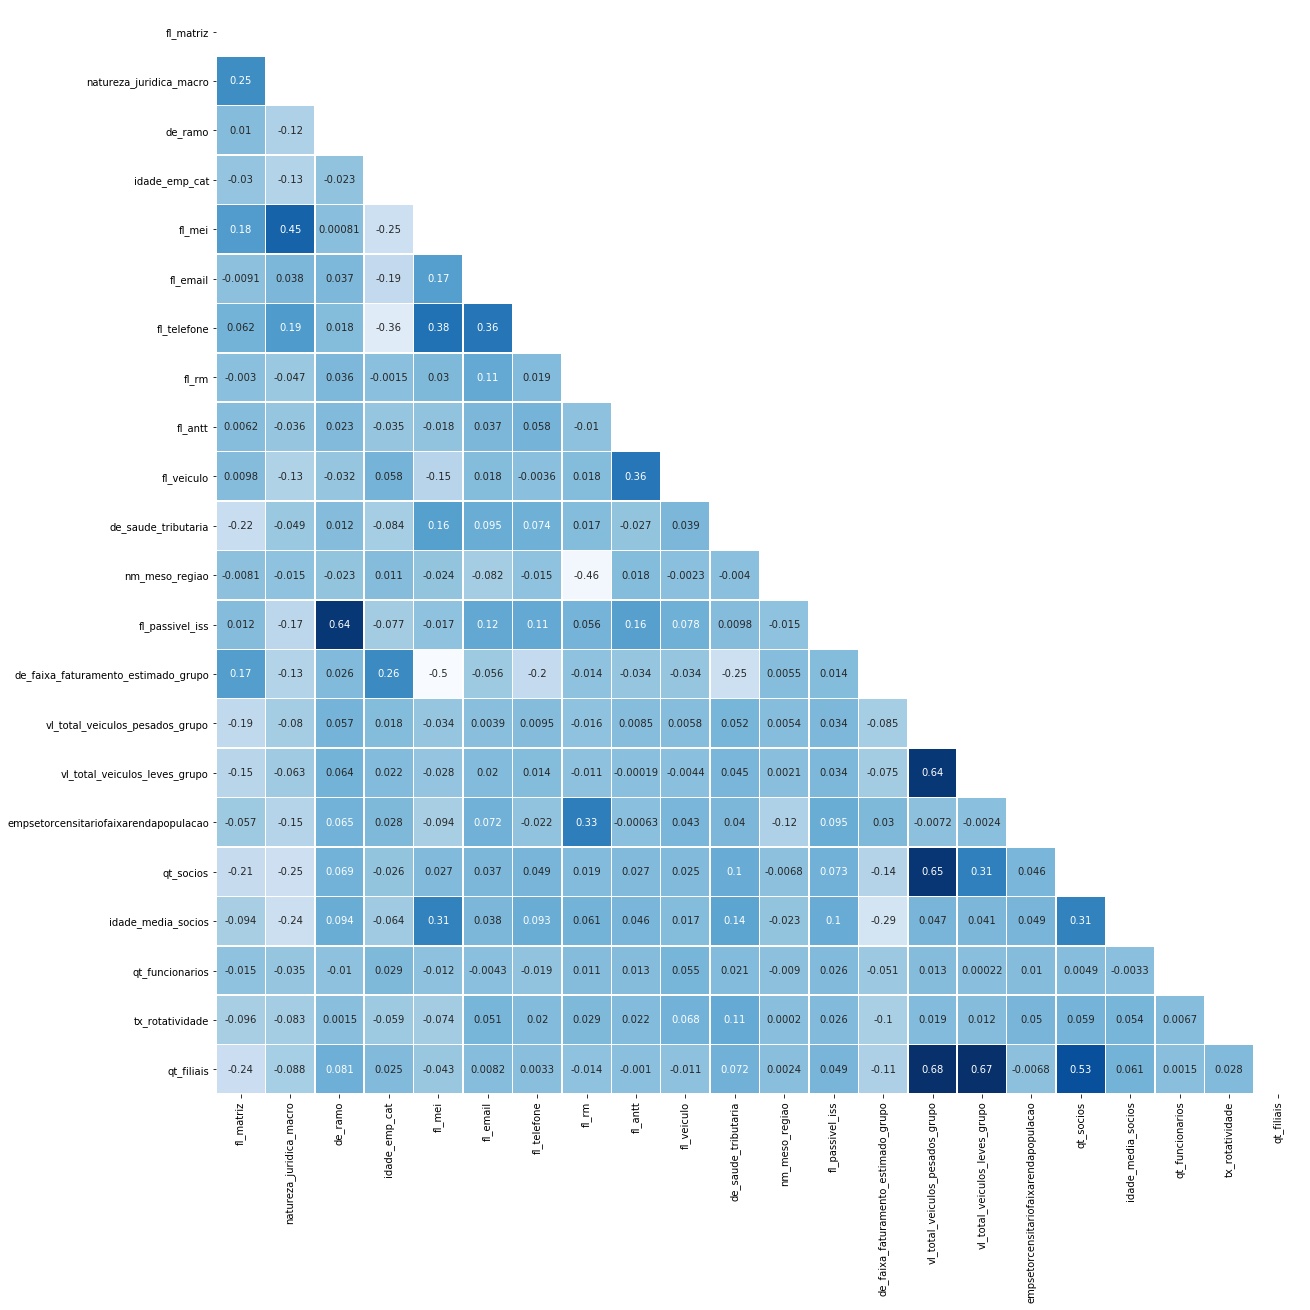

In [89]:
mask = np.zeros_like(test_cor)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(test_cor,cmap="Blues", linewidths=0.5, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
plt.show()

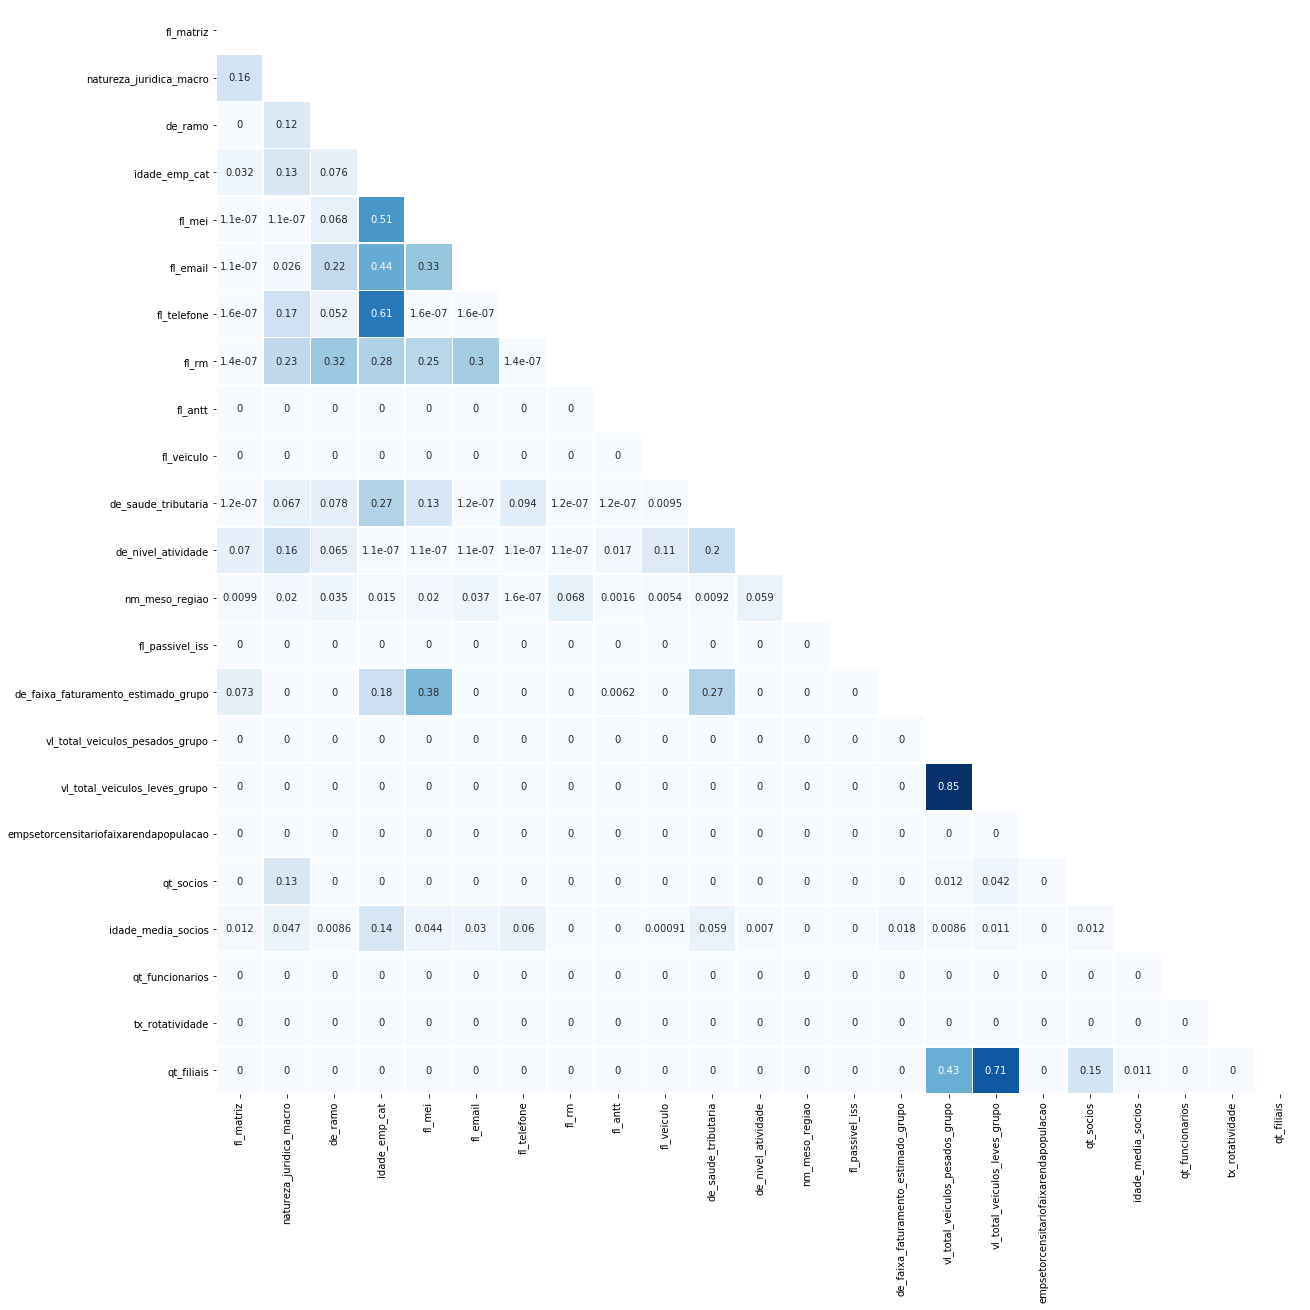

In [469]:
matrix = pps.matrix(test_cor)
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(matrix,cmap="Blues", linewidths=0.5, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
plt.show()

***

## Verificando as correlações

In [ ]:
def heatmap(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(df, cmap="Blues",mask=mask, square=True, linewidths=0.5, annot=False,cbar=False,yticklabels=False)
    ax.set_title('PPS matrix')
    return ax
def corr_heatmap(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(df,cmap="Blues",mask=mask, square=True, linewidths=0.5, annot=False,cbar=False)
    ax.set_title('Correlation matrix')
    return ax

In [ ]:
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2, 1)
corr_heatmap(col_num_70.corr())

f.add_subplot(1,2, 2)
matrix = pps.matrix(col_num_70)
heatmap(matrix)